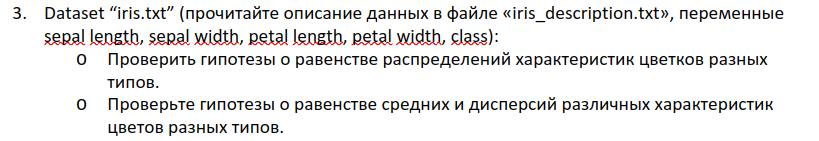

In [51]:
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm

cols = ['s_length', 's_width', 'p_length', 'p_width', 'clas']
df = pd.read_csv('datasets/iris.txt', sep=',', header=None, names=cols)

df.head()


,s_length,s_width,p_length,p_width,clas
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
df.clas.value_counts()

clas
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [53]:
df1 = df.loc[(df['clas'] == 'Iris-setosa')]
df2 = df.loc[(df['clas'] == 'Iris-versicolor')]
df3 = df.loc[(df['clas'] == 'Iris-virginica')]

dfs = [df1, df2, df3]
titles = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

### Проверка характеристик на нормальность c пом. критерия Колмогорова

In [54]:
def get_(pval):
    if pval < 0.05:
        return " -"
    else:
        return " +"

In [55]:
norm = []

for j in range(3):
    print(titles[j])
    df = dfs[j]
    for i in range(len(cols)-1):
        print(cols[i], get_(sm.stats.diagnostic.lilliefors(df[cols[i]], dist='norm', pvalmethod='table')[1]), sm.stats.diagnostic.lilliefors(df[cols[i]], dist='norm', pvalmethod='table')[1])
        if get_(sm.stats.diagnostic.lilliefors(df[cols[i]], dist='norm', pvalmethod='table')[1]) == ' +':
            norm.append((j, i))
    print()

Iris-setosa
s_length  + 0.09683860719317593
s_width  + 0.09717298477796212
p_length  - 0.0032607565435438966
p_width  - 0.0009999999999998899

Iris-versicolor
s_length  + 0.29340127602996746
s_width  + 0.06626553840094641
p_length  + 0.08376628261737941
p_width  - 0.008331150257610833

Iris-virginica
s_length  + 0.09583054534854582
s_width  - 0.04078153800953464
p_length  + 0.10684689258669411
p_width  + 0.06580747882154397



### Проверка гипотез о рав-ве распределений характеристик цветков разных типов

##### Критерий Краскела-Уоллиса

In [56]:
def get_kruskal(p):
    return st.kruskal(df1[cols[p]], df2[cols[p]], df3[cols[p]]).pvalue

for i in range(len(cols)-1):
    print(cols[i])
    print(get_kruskal(i))
    print()

s_length
8.91873433246198e-22

s_width
2.6882119006774528e-14

p_length
4.7967237479455454e-29

p_width
3.415387999117524e-29



In [57]:
for i in range(len(cols)-1):
    print(cols[i])
    for j in range(len(dfs)):
        for k in range(j+1, len(dfs)):
            if (j, i) in norm and (k, j) in norm:
                print(get_(st.ks_2samp(dfs[k][cols[i]], dfs[j][cols[i]]).pvalue), round(st.ks_2samp(dfs[k][cols[i]], dfs[j][cols[i]]).pvalue, 3), titles[j], 'vs', titles[k])
            else:
                print(get_(st.kruskal(dfs[k][cols[i]], dfs[j][cols[i]]).pvalue), round(st.kruskal(dfs[k][cols[i]], dfs[j][cols[i]]).pvalue,3), titles[j], 'vs', titles[k])
    print()

s_length
 - 0.0 Iris-setosa vs Iris-versicolor
 - 0.0 Iris-setosa vs Iris-virginica
 - 0.0 Iris-versicolor vs Iris-virginica

s_width
 - 0.0 Iris-setosa vs Iris-versicolor
 - 0.0 Iris-setosa vs Iris-virginica
 - 0.005 Iris-versicolor vs Iris-virginica

p_length
 - 0.0 Iris-setosa vs Iris-versicolor
 - 0.0 Iris-setosa vs Iris-virginica
 - 0.0 Iris-versicolor vs Iris-virginica

p_width
 - 0.0 Iris-setosa vs Iris-versicolor
 - 0.0 Iris-setosa vs Iris-virginica
 - 0.0 Iris-versicolor vs Iris-virginica



### Проверка гипотез о рав-ве средних и дисперсий характеристик цветков разных типов

##### Все вместе

In [58]:
# среднее
def get_kruskal(p):
    return st.kruskal(df1[cols[p]], df2[cols[p]], df3[cols[p]]).pvalue
    #return st.f_oneway(df1[cols[p]], df2[cols[p]], df3[cols[p]])

# дисперсия
def get_levene(p):
    return st.levene(df1[cols[p]], df2[cols[p]], df3[cols[p]]).pvalue

for i in range(len(cols)-1):
    print(cols[i])
    print("Средние   ", get_(get_kruskal(i)), get_kruskal(i))
    print("Дисперсия ", get_(get_levene(i)), get_levene(i))
    print()

s_length
Средние     - 8.91873433246198e-22
Дисперсия   - 0.0022585277836218586

s_width
Средние     - 2.6882119006774528e-14
Дисперсия   + 0.5248269975064537

p_length
Средние     - 4.7967237479455454e-29
Дисперсия   - 2.5892961840828553e-08

p_width
Средние     - 3.415387999117524e-29
Дисперсия   - 3.301949958497502e-08



##### Попарно

In [59]:
for i in range(len(cols)-1):
    print(cols[i])
    for j in range(len(dfs)):
        for k in range(j+1, len(dfs)):
            print(titles[j], 'vs', titles[k])
            if (j, i) in norm and (k, j) in norm:
                print("     Средние   ", get_(st.ttest_ind(dfs[k][cols[i]], dfs[j][cols[i]]).pvalue), round(st.ttest_ind(dfs[k][cols[i]], dfs[j][cols[i]]).pvalue, 3))
                print("     Дисперсия ", get_(st.bartlett(dfs[k][cols[i]], dfs[j][cols[i]]).pvalue), round(st.bartlett(dfs[k][cols[i]], dfs[j][cols[i]]).pvalue, 3))
            else:
                print("     Средние   ", get_(st.kruskal(dfs[k][cols[i]], dfs[j][cols[i]]).pvalue), round(st.kruskal(dfs[k][cols[i]], dfs[j][cols[i]]).pvalue,3))
                print("     Дисперсия ", get_(st.levene(dfs[k][cols[i]], dfs[j][cols[i]]).pvalue), round(st.levene(dfs[k][cols[i]], dfs[j][cols[i]]).pvalue,3))
    print()

s_length
Iris-setosa vs Iris-versicolor
     Средние     - 0.0
     Дисперсия   - 0.009
Iris-setosa vs Iris-virginica
     Средние     - 0.0
     Дисперсия   - 0.0
Iris-versicolor vs Iris-virginica
     Средние     - 0.0
     Дисперсия   + 0.314

s_width
Iris-setosa vs Iris-versicolor
     Средние     - 0.0
     Дисперсия   + 0.178
Iris-setosa vs Iris-virginica
     Средние     - 0.0
     Дисперсия   + 0.247
Iris-versicolor vs Iris-virginica
     Средние     - 0.005
     Дисперсия   + 0.768

p_length
Iris-setosa vs Iris-versicolor
     Средние     - 0.0
     Дисперсия   - 0.0
Iris-setosa vs Iris-virginica
     Средние     - 0.0
     Дисперсия   - 0.0
Iris-versicolor vs Iris-virginica
     Средние     - 0.0
     Дисперсия   + 0.304

p_width
Iris-setosa vs Iris-versicolor
     Средние     - 0.0
     Дисперсия   - 0.0
Iris-setosa vs Iris-virginica
     Средние     - 0.0
     Дисперсия   - 0.0
Iris-versicolor vs Iris-virginica
     Средние     - 0.0
     Дисперсия   - 0.012

